# KNN Model :

## **1.The problem** :

we try to localise a basketbool player in the stad based with the caracteristique of the player .
- So to simplifiy this we have 3 post :

- the center player : C (the 5 position in the schema)
- the Ailier player : F (the 3 and 4 position in the schema)
- the last(arriere) player : G (the 1 and 2 position in the schema)

<div align="center">
  <a href="https://imgbb.com/" target="_blank" rel="noreferrer">
    <img src="https://i.ibb.co/09gZSbh/Capture-d-cran-2024-10-11-181044.png" alt="Capture-d-cran-2024-10-11-181044" border="12" />
  </a>
</div>


As with all types of machine learning, the principle is as follows:

- We start by studying a given population, called the training set. The quality of the sampling used for this population will determine how well the algorithm can make predictions. The study of this population should allow us to create groups of objects with similar properties. For example, the group consisting of center-type players will probably be taller and stronger than the other players.
- Then, we have a population outside of this sampling. We seek to predict their position on the field based on their physical characteristics, according to the results of the previous study.







## **2.The data set** :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data = pd.read_csv(r"C:\Users\hp\Downloads\joueursNBA2020.csv", sep=";", on_bad_lines='skip')
cleaned_data = data[['nom','equipe','poste','taille','poids','experience','pays']].dropna()
cleaned_data['poids'] = cleaned_data['poids'].replace(to_replace='kg', value='', regex=True)
print(cleaned_data.head())

                 nom equipe poste  taille   poids  experience        pays
0  Aldridge Grayson     MEM     G    1.93   89.8          1.0  États-Unis
1   Allen Al-Farouq     ORL     F    2.03   99.8          9.0  États-Unis
2     Allen Jarrett     BKN     C    2.11  110.2          2.0  États-Unis
3      Allen Kadeem     NYK     G    1.85   90.7          2.0  États-Unis
4        Aminu Kyle     MEM   F-G    2.06  104.3          5.0  États-Unis


In [22]:
cleaned_data['poids'] = cleaned_data['poids'].astype('float')
cleaned_data['taille'] = cleaned_data['taille'].astype('float')

In [23]:
cleaned_data.head()

,nom,equipe,poste,taille,poids,experience,pays
0,Aldridge Grayson,MEM,G,1.93,89.8,1.0,États-Unis
1,Allen Al-Farouq,ORL,F,2.03,99.8,9.0,États-Unis
2,Allen Jarrett,BKN,C,2.11,110.2,2.0,États-Unis
3,Allen Kadeem,NYK,G,1.85,90.7,2.0,États-Unis
4,Aminu Kyle,MEM,F-G,2.06,104.3,5.0,États-Unis


In [24]:
cleaned_data.shape

(57, 7)

## **3. Fillter the data :**

we can filter the data using methos of pandas :

In [27]:
filter = cleaned_data['poste'] == 'C'
filter.head()

0    False
1    False
2     True
3    False
4    False
Name: poste, dtype: bool

In [28]:
df = cleaned_data[filter]
df

,nom,equipe,poste,taille,poids,experience,pays
2,Allen Jarrett,BKN,C,2.11,110.2,2.0,États-Unis
12,Ball Mo,ORL,C,2.13,104.8,1.0,États-Unis
39,Brown Moses,POR,C,2.18,111.1,0.0,États-Unis
49,Mo Bamba,ORL,C,2.13,104.8,1.0,États-Unis
50,Khem Birch,ORL,C,2.06,105.7,2.0,Canada
51,Fall Tacko,BOS,C,2.26,141.1,0.0,Sénégal
52,Hartenstein Isaiah,HOU,C,2.13,113.4,1.0,Allemagne
53,Hernandez Dewan,TOR,C,2.08,106.6,0.0,États-Unis
55,Jones Damian,ATL,C,2.11,111.1,3.0,États-Unis
56,DeAndre Jordan,BKN,C,2.11,120.2,11.0,États-Unis


## **4. visualize the data :**

we will visualize the palyer using the ('taille', 'poids')

In [33]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
def points(postes, size=20, marker='o', alpha=0.5):
    for poste in postes:
        df = cleaned_data[cleaned_data['poste'] == poste]
        x = df['taille']
        y = df['poids']
        plt.scatter(x, y, label=poste, s=size, marker=marker, alpha=alpha)

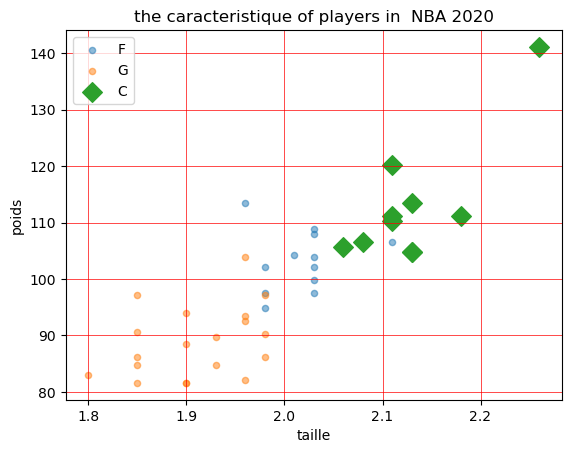

In [34]:
plt.title('the caracteristique of players in  NBA 2020')
plt.xlabel("taille")
plt.ylabel("poids")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
points('F')
points('G')
points('C',100,'D',1)
axes = plt.gca()
plt.legend()
plt.show()

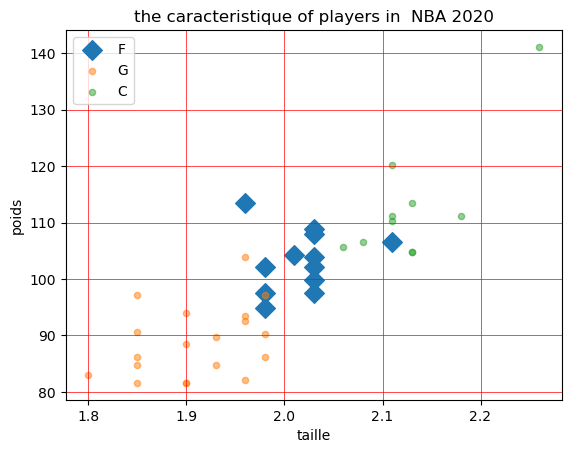

In [35]:
plt.title('the caracteristique of players in  NBA 2020')
plt.xlabel("taille")
plt.ylabel("poids")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
points('F',100,'D',1)
points('G',20,'o',0.5)
points('C',20,'o',0.5)
axes = plt.gca()
plt.legend()
plt.show()

In [36]:
## the multi post :
filter = cleaned_data['poste'] == 'G-F'
df = cleaned_data[filter]
df.head()

,nom,equipe,poste,taille,poids,experience,pays
9,Augustin Dwayne,CHA,G-F,1.98,100.2,2.0,États-Unis
17,Bates-Diop Kent,SAC,G-F,1.93,88.5,7.0,États-Unis
21,Beasley DeAndre',ATL,G-F,1.96,95.3,3.0,États-Unis
34,Brogdon Bruce,DET,G-F,1.93,91.6,1.0,États-Unis
36,Brown Jaylen,BOS,G-F,1.98,101.2,3.0,États-Unis


In [37]:
# localisation of the first post === 'G-F'
df.loc[9]

nom           Augustin Dwayne 
equipe                     CHA
poste                      G-F
taille                    1.98
poids                    100.2
experience                 2.0
pays                États-Unis
Name: 9, dtype: object

## **5. function that localise a player in the visual**:

we will build a fucntion player() , it will display the visula contient the localisation of the player .

In [38]:
def player(num, rayon):
    ratio = 0.005 # echelle des X / echelle des Y
    plt.title('caractéristiques des joueurs de NBA 2020')
    plt.xlabel("taille")
    plt.ylabel("poids")
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    points(['F','G','C'])
    x = df.loc[num]['taille']
    y = df.loc[num]['poids']
    plt.scatter(x,y,s=50, marker='P', alpha=1)
    circle = plt.Circle((x, y), 1, color='r')
    fig = plt.gcf()
    ax = fig.gca() # gca() signifie Obtenir l'axe actuel
    ax.set_aspect(ratio) # je choisi le ratio DX/DY pour les echelles desaxes
    ax.add_artist(Ellipse((x, y), rayon*ratio, rayon,color='yellow',alpha=0.2))
    plt.legend()
    plt.show()

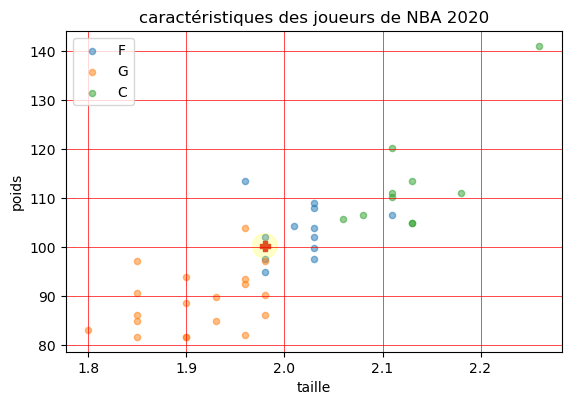

In [42]:
# correction
player(9, 5)

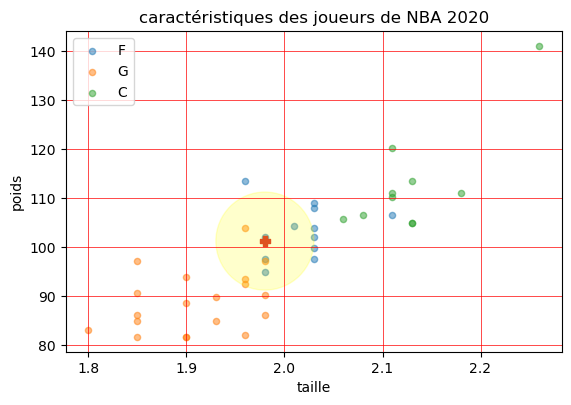

In [44]:
# correction
player(36, 20)

**Question f**: What is the position of the closest neighbors of this player (within the circle)? ==> **the G (4)   not a F(2)

The **k-nearest neighbors algorithm** can be described in natural language as follows:

- Find the k nearest neighbors of the player within the training set.
- Among these nearest neighbors, find the most common classification.
- Return the most common classification.


Let me know if you need further details!

### the first one we can do is to group the posts to categories (in other ways we will sort them )

In [45]:
ensC = cleaned_data[cleaned_data['poste'] == 'C']
ensF = cleaned_data[cleaned_data['poste'] == 'F']
ensG = cleaned_data[cleaned_data['poste'] == 'G']

In [46]:
# concatenate those posts :
training = pd.concat([ensC, ensF, ensG])

In [47]:
training.head()

,nom,equipe,poste,taille,poids,experience,pays
2,Allen Jarrett,BKN,C,2.11,110.2,2.0,États-Unis
12,Ball Mo,ORL,C,2.13,104.8,1.0,États-Unis
39,Brown Moses,POR,C,2.18,111.1,0.0,États-Unis
49,Mo Bamba,ORL,C,2.13,104.8,1.0,États-Unis
50,Khem Birch,ORL,C,2.06,105.7,2.0,Canada


In [48]:
training.tail()

,nom,equipe,poste,taille,poids,experience,pays
32,Bridges Malcolm,IND,G,1.96,103.9,3.0,États-Unis
35,Brown Charles,ATL,G,1.98,90.3,0.0,États-Unis
37,Brown Jr. Jalen,DAL,G,1.85,86.2,1.0,États-Unis
43,Bullock Alec,PHI,G,1.98,97.1,8.0,États-Unis
47,Cacok Kentavious,LAL,G,1.96,92.5,6.0,États-Unis


In [49]:
### we will calculate the distances : (using the euclideint distances )

In [51]:
def distance(num, ratio):
    x = cleaned_data.loc[num]['taille']
    y = cleaned_data.loc[num]['poids']
    training['ensemble'] =np.sqrt((training['poids'] - y) ** 2 + (training['taille'] - x) ** 2)
    
    

In [52]:
distance(9, 0.005)
training.head()

,nom,equipe,poste,taille,poids,experience,pays,ensemble
2,Allen Jarrett,BKN,C,2.11,110.2,2.0,États-Unis,10.000845
12,Ball Mo,ORL,C,2.13,104.8,1.0,États-Unis,4.602445
39,Brown Moses,POR,C,2.18,111.1,0.0,États-Unis,10.901835
49,Mo Bamba,ORL,C,2.13,104.8,1.0,États-Unis,4.602445
50,Khem Birch,ORL,C,2.06,105.7,2.0,Canada,5.500582


### we will use the sorting to dertermine the most k neighboor:


In [61]:
 training = training.sort_values(by='ensemble')

In [62]:
training.head()

,nom,equipe,poste,taille,poids,experience,pays,ensemble
1,Allen Al-Farouq,ORL,F,2.03,99.8,9.0,États-Unis,0.403113
33,Bridges Miles,CHA,F,1.98,102.1,1.0,États-Unis,1.900000
14,Bamba Harrison,SAC,F,2.03,102.1,7.0,États-Unis,1.900658
48,Caldwell-Pope DeMarre,HOU,F,1.98,97.5,10.0,États-Unis,2.700000
7,Arcidiacono Trevor,POR,F,2.03,97.5,15.0,États-Unis,2.700463


### Implementing the KNN algorithm : 

In [63]:
def KNN(k, data):
    score = {'F': 0, 'G': 0, 'C': 0}
    for i in range(k):
        z = data.index[i]
        if data.loc[z]['poste'] == 'F':
            score['F'] += 1
        elif data.loc[z]['poste'] == 'G':
            score['G'] += 1
        elif data.loc[z]['poste'] == 'C':
            score['C'] += 1 
    return score

In [66]:
print(KNN(40, training))

{'F': 12, 'G': 19, 'C': 9}
